In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("scores.txt", names=['dimCount', 'scores', 'eps'], sep=";")

df.head()

,dimCount,scores,eps
0,0,0,0
1,1,"0.898209,1,0.483995,0.680207,1,1,0.782141,1,1,...","0.0550377,0.123835,0.123835,0.123835,0.02,0.02..."
2,2,"1,1,1,1,1,0.952817,0.914202,1,1,1,1,1,1,1,1,0....","0.02,0.02,0.02,0.123835,0.016,0.02,0.02,0.016,..."
3,3,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.985176,1,0...","0.0128,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01..."
4,4,"1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,...","0.02,0.02,0.02,0.00214748,0.016,0.02,0.02,0.02..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dimCount  500 non-null    int64 
 1   scores    500 non-null    object
 2   eps       500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [4]:
df['scores'] = df['scores'][df['scores'] != '0']
df['eps'] = df['eps'][df['eps'] != '0']
df = df.dropna()

In [5]:
df.head(30)

,dimCount,scores,eps
1,1,"0.898209,1,0.483995,0.680207,1,1,0.782141,1,1,...","0.0550377,0.123835,0.123835,0.123835,0.02,0.02..."
2,2,"1,1,1,1,1,0.952817,0.914202,1,1,1,1,1,1,1,1,0....","0.02,0.02,0.02,0.123835,0.016,0.02,0.02,0.016,..."
3,3,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.985176,1,0...","0.0128,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01..."
4,4,"1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,...","0.02,0.02,0.02,0.00214748,0.016,0.02,0.02,0.02..."
5,5,"1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0.02,0.016,0.02,0.02,0.02,0.00214748,0.02,0.02..."
6,6,"1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,...","0.02,0.02,0.02,0.016,0.02,0.02,0.02,0.02,0.016..."
7,7,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0.02,0.02,0.016,0.02,0.02,0.0128,0.02,0.02,0.0..."
8,8,"1,1,1,1,1,1,1","0.02,0.016,0.016,0.02,0.02,0.0128,0.02"


In [6]:
df['scores'] = df['scores'].map(lambda a: a.split(','))
df['eps'] = df['eps'].map(lambda a: a.split(','))

In [7]:
df['scores'] = df['scores'].map(lambda a: np.array(a).astype(float))
df['eps'] = df['eps'].map(lambda a: np.array(a).astype(float))

In [8]:
df.head()

,dimCount,scores,eps
1,1,"[0.898209, 1.0, 0.483995, 0.680207, 1.0, 1.0, ...","[0.0550377, 0.123835, 0.123835, 0.123835, 0.02..."
2,2,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.952817, 0.914202, ...","[0.02, 0.02, 0.02, 0.123835, 0.016, 0.02, 0.02..."
3,3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0128, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0..."
4,4,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.02, 0.02, 0.02, 0.00214748, 0.016, 0.02, 0...."
5,5,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.02, 0.016, 0.02, 0.02, 0.02, 0.00214748, 0...."


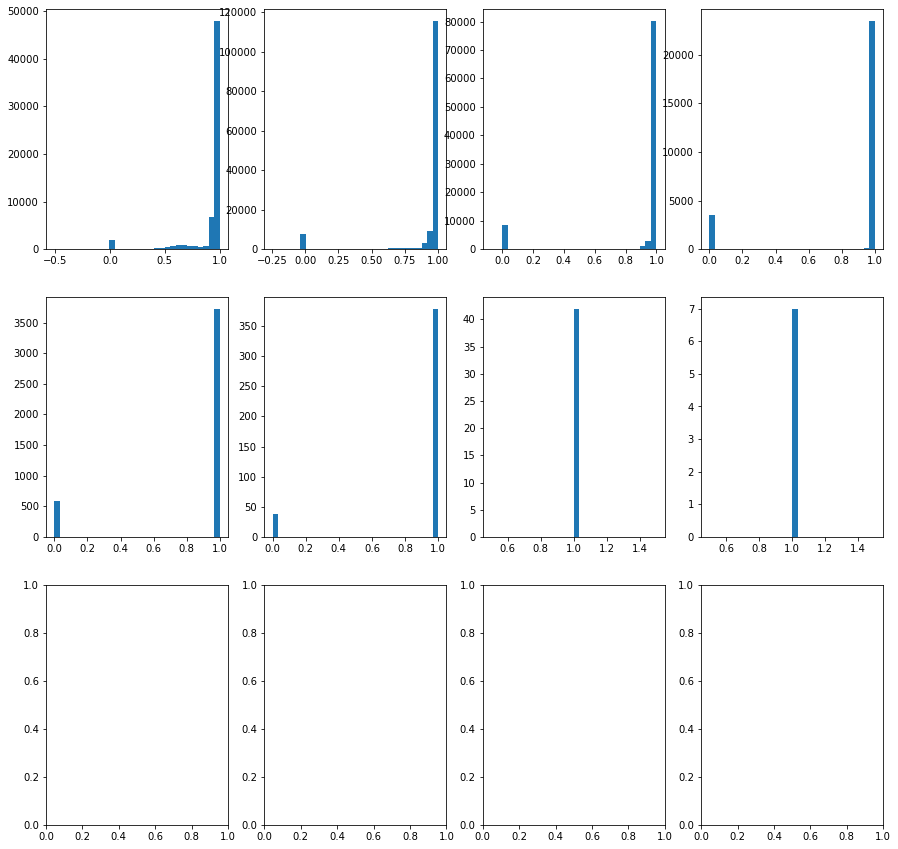

In [22]:
nEntries = df.shape[0]

fig, axs = plt.subplots(int(nEntries / 4 + 1), 4, figsize=(15, 15))

i = 0

for index, row in df.T.iteritems():
    axs[int(i / 4), int(i % 4)].hist(row['scores'], bins=30)

    i = i + 1

(array([2.20270e+04, 8.00000e+01, 2.20000e+02, 1.77200e+03, 9.00400e+03,
        3.17720e+04, 3.70000e+01, 2.30242e+05, 4.82900e+03, 3.40000e+01,
        9.26000e+02, 0.00000e+00, 2.60000e+01, 7.31000e+02, 4.80000e+01,
        2.90000e+01, 9.13000e+02, 3.00000e+00, 3.00000e+01, 1.00400e+03,
        0.00000e+00, 1.31000e+02, 4.10000e+01, 1.33200e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.90000e+01, 1.85000e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.59000e+02, 2.18400e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.50000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.52560e+04]),
 array([0.00214748, 0.00458123, 0.00701498, 0.00944873, 0.01188248,
        0.01431623, 0.01674998, 0.01918373, 0.02161748, 0.02405123,
        0.02648498, 0.02891873, 0.03135248, 0.03378624, 0.03621999,
        0.03865374, 0.04108749, 0.04352124, 0.04595499, 0.048388

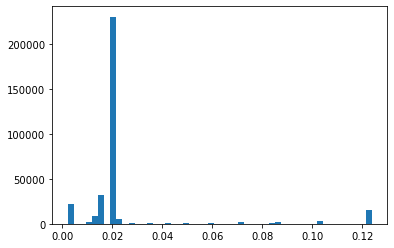

In [21]:
epsilons = []

for date, eps in df.iterrows():
    epsilons.extend(eps['eps'])

plt.hist(epsilons, bins=50)